In [2]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.1f}'.format

# Part1

## 1. 문제 정의 및 데이터 선정 이유

a. 프로젝트의 목표

1) 문제정의

* 발표자는 이커머스 회사의 데이터 사이언티스트라고 가정한다.
* 현 시점은 21년도를 준비하는 20년도 말로 가정한다.
* 이 회사의 신선식품 부서는 21년도 상반기 매출 극대화를 위한 비즈니스 모델을 구축하기를 원한다.

2) 해결하고자 하는 문제 제시

* 판매에 집중하기 위한 주력 상품을 선정할 때 데이터에 기반하지 않고 경험에 의존한다.

3) 문제 해결의 필요성에 대해 제시

* 전년도에는 데이터를 살펴보지 않고 주력 상품을 정했기 때문에 수요에 맞게 재고를 준비할 수 없었고 마진도 충분히 확보하지 못하였다.

b. 데이터셋 선정

* 데이터셋은 농넷에 있는 2016 ~ 2020 전국도매시장 거래정보 데이터를 이용하였다.
* 이커머스라고 할지라도 실제 상품은 경매를 거친 도매시장에서 고객에게 배송되기에 도매 가격이 원가로 책정되기 때문이다.

## 2. 데이터 전처리, EDA

In [ ]:
path1 = 'c:/Users/user/data/2016'
path2 = 'c:/Users/user/data/2017'
path3 = 'c:/Users/user/data/2018'
path4 = 'c:/Users/user/data/2019'
path5 = 'c:/Users/user/data/2020'
path6 = 'c:/Users/user/data/2021'

files1 = os.listdir(path1)
files2 = os.listdir(path2)
files3 = os.listdir(path3)
files4 = os.listdir(path4)
files5 = os.listdir(path5)
files6 = os.listdir(path6)

In [ ]:
df16 = pd.DataFrame()

for i in files1:
    data = pd.read_csv(path1 + '/' + i)
    df16 = pd.concat([df16,data])

df16 = df16.reset_index(drop = True)

In [ ]:
df17 = pd.DataFrame()

for i in files2:
    data = pd.read_csv(path2 + '/' + i)
    df17 = pd.concat([df17,data])

df17 = df17.reset_index(drop = True)

In [ ]:
df18 = pd.DataFrame()

for i in files3:
    data = pd.read_csv(path3 + '/' + i)
    df18 = pd.concat([df18,data])

df18 = df18.reset_index(drop = True)

In [ ]:
df19 = pd.DataFrame()

for i in files4:
    data = pd.read_csv(path4 + '/' + i)
    df19 = pd.concat([df19,data])

df19 = df19.reset_index(drop = True)

In [ ]:
df20 = pd.DataFrame()

for i in files5:
    data = pd.read_csv(path5 + '/' + i)
    df20 = pd.concat([df20,data])

df20 = df20.reset_index(drop = True)

In [ ]:
df21 = pd.DataFrame()

for i in files6:
    data = pd.read_csv(path6 + '/' + i)
    df21 = pd.concat([df21,data])

df21 = df21.reset_index(drop = True)

데이터셋 칼럼 설명

* SALEDATE : 경락 일자
    int로 되어있기 때문에 날짜 타입으로 변환

* WHSAL_NM : 도매 시장
    작물별 일별 평균거래 가격을 이용할 것이므로 삭제
    
* CMP_NM : 법인
    중요하지 않은 특성이므로 삭제
    
* PUM_NM : 품목
    쇼핑 검색어 통계에서 과일이 채소보다 우위이므로 과일만 선별하고 나머지는 삭제
    
* KIND_NM : 품종
    가격을 결정하는 중요한 요소이지만 cardinality 가 1607가지 이므로 정제가 필요하다.
    
* DAN_NM : 단위
    kg 단위가 거의 대부분이므로 나머지 단위는 삭제 후 칼럼 삭제
    
* POJ_NM : 포장
    상자와 결측치가 대부분이므로 나머지는 삭제 후 칼럼 삭제
    
* SIZE_NM : 크기
    결측치가 대부분이므로 칼럼 삭제
    
* LV_NM : 등급
    특 등급이 대부분을 차지하므로 특,상,보통,등외 4가지 등급만 남기고
    나머지 등급은 등외, 유기농산물은 비중이 미미하므로 삭제
    
* SAN_NM : 산지
    유통되는 품질과 가격을 결정하는 중요한 요소이지만 cardinality 가 521가지 이므로 정제가 필요하다.
    결측치 처리가 필요하다.
    
* DANQ : 단위중량
    이상치를 제거하고 0.0의 경우 다른 값을 확인하여 취소된 거래의 경우 삭제
    
* QTY : 물량
    마이너스(-) 의 경우 취소된 거래이므로 삭제
    
* COST : 단가
    0.0의 경우 취소된 거래이므로 삭제
    
* TOT_QTY : 총 물량
    DANQ x QTY 의 값으로 마이너스인 경우 취소된 거래이므로 삭제
    
* TOT_AMT : 총 금액
    QTY x COST 의 값으로 마이너스인 경우 취소된 거래이므로 삭제
    예측해야 할 타겟으로 예측 후 TOT_AMT / TOT_QTY 로 평균 단가를 계산한다.
    

In [ ]:
def convert(df):
    df_copy = df.copy()
    pum = ['사과','딸기','참외','복숭아','토마토','감귤','수박','포도','방울토마토','바나나']

    df_copy = df_copy.query('(PUM_NM == @pum) and (DAN_NM == "kg") and ((POJ_NM == "상자") or (POJ_NM == ".")) and ((QTY > 0) and (TOT_QTY > 0) and (COST > 0) and (TOT_AMT > 0) and (DANQ > 0))')
    df_copy['SALEDATE'] = pd.to_datetime(df_copy.SALEDATE, format='%Y%m%d')
    df_copy.drop(['WHSAL_NM','CMP_NM','SIZE_NM','DAN_NM','POJ_NM','SAN_NM','DANQ','QTY','COST'], axis=1, inplace=True)

    df_copy['LV_NM'] = df_copy.LV_NM.str.replace('.','등외').str.replace('4등','등외').str.replace('5등','등외').str.replace('6등','등외').str.replace('7등','등외').str.replace('8등','등외')
    df_copy = df_copy.drop(df_copy.query('(LV_NM == "저농약농산물") or (LV_NM == "무농약농산물") or (LV_NM == "유기농산물")').index)

    df_copy['KIND_NM'] = df_copy['KIND_NM'].str.replace('[^가-힣]','', regex=True)
    df_copy.dropna(inplace=True)
    df_copy = df_copy.groupby(['SALEDATE','PUM_NM','KIND_NM','LV_NM'], as_index=False)['TOT_QTY','TOT_AMT'].sum()
    df_copy.reset_index(drop=True, inplace=True)
    return df_copy

In [ ]:
df16_convert = convert(df16)
df17_convert = convert(df17)
df18_convert = convert(df18)
df19_convert = convert(df19)
df20_convert = convert(df20)
df21_convert = convert(df21)

In [ ]:
df21_convert

,SALEDATE,PUM_NM,KIND_NM,LV_NM,TOT_QTY,TOT_AMT
0,2021-01-02,감귤,기타감귤,등외,7885.0,11943800.0
1,2021-01-02,감귤,기타감귤,상,2260.0,3837200.0
2,2021-01-02,감귤,기타감귤,특,16895.0,29499400.0
3,2021-01-02,감귤,레드향,특,4525.0,30034000.0
4,2021-01-02,감귤,조생귤,등외,35137.5,54164700.0
...,...,...,...,...,...,...
33511,2021-06-30,포도,캠벨얼리,보통,721.0,4706500.0
33512,2021-06-30,포도,캠벨얼리,상,3280.0,21864300.0
33513,2021-06-30,포도,캠벨얼리,특,7477.0,62042700.0
33514,2021-06-30,포도,포도수입,상,18.2,154000.0


In [ ]:
df = pd.concat([df16_convert, df17_convert, df18_convert, df19_convert])
df = df.dropna().reset_index(drop=True)

In [ ]:
fruits = df['KIND_NM'].value_counts().head(100).index.to_list()
fruits = '|'.join(fruits)

train = df[df['KIND_NM'].str.contains(fruits)].reset_index(drop=True)
val = df20_convert[df20_convert['KIND_NM'].str.contains(fruits)].reset_index(drop=True)
test = df21_convert[df21_convert['KIND_NM'].str.contains(fruits)].reset_index(drop=True)

train['AVG_PRICE'] = train['TOT_AMT'] / train['TOT_QTY']
val['AVG_PRICE'] = val['TOT_AMT'] / val['TOT_QTY']
test['AVG_PRICE'] = test['TOT_AMT'] / test['TOT_QTY']

In [ ]:
train.sort_values('AVG_PRICE', ascending=False)

,SALEDATE,PUM_NM,KIND_NM,LV_NM,TOT_QTY,TOT_AMT,AVG_PRICE
262394,2019-11-18,복숭아,기타복숭아,특,4.5,72478000.0,16106222.2
265643,2019-12-06,복숭아,기타복숭아,등외,0.1,25000.0,250000.0
152877,2018-04-28,자두,대석,특,4.0,543000.0,135750.0
4755,2016-02-01,사과,홍옥,상,1.2,132000.0,110000.0
251478,2019-09-23,감귤,기타감귤,상,0.1,7460.0,74600.0
...,...,...,...,...,...,...,...
243273,2019-08-13,복숭아,미시마,등외,40.0,2000.0,50.0
175602,2018-08-16,사과,사과,보통,100.0,5000.0,50.0
241678,2019-08-06,복숭아,장호원황도,상,36.0,1600.0,44.4
85529,2017-04-29,단감,기타단감,상,705.0,24600.0,34.9


In [ ]:
train = train.drop(index=262394).reset_index(drop=True)
train

,SALEDATE,PUM_NM,KIND_NM,LV_NM,TOT_QTY,TOT_AMT,AVG_PRICE
0,2016-01-01,감귤,조생귤,상,12240.0,10964500.0,895.8
1,2016-01-01,감귤,천헤향,상,96.0,570000.0,5937.5
2,2016-01-01,감귤,황금향,상,108.0,418000.0,3870.4
3,2016-01-01,단감,부유,상,700.0,1011000.0,1444.3
4,2016-01-01,딸기,설향,상,305.0,3215500.0,10542.6
...,...,...,...,...,...,...,...
269988,2019-12-31,포도,포도,등외,536.0,2622000.0,4891.8
269989,2019-12-31,포도,포도,특,2529.2,9934000.0,3927.7
269990,2019-12-31,포도,포도수입,등외,4300.0,16554500.0,3849.9
269991,2019-12-31,포도,포도수입,상,204.8,736000.0,3593.8


In [ ]:
def date(df):
    df['year'] = df['SALEDATE'].dt.year
    df['month'] = df['SALEDATE'].dt.month
    return df

train = date(train)
val = date(val)
test = date(test)

In [82]:
train.to_csv('section2_train.csv', sep=',')
val.to_csv('section2_val.csv', sep=',')
test.to_csv('section2_test.csv', sep=',')

In [191]:
train = pd.read_csv('section2_train.csv', index_col=0)
val = pd.read_csv('section2_val.csv', index_col=0)
test = pd.read_csv('section2_test.csv', index_col=0)

train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

In [192]:
train

,SALEDATE,PUM_NM,KIND_NM,LV_NM,TOT_QTY,TOT_AMT,AVG_PRICE,year,month
0,2016-01-01,감귤,조생귤,상,12240.0,10964500.0,895.8,2016,1
1,2016-01-01,감귤,천헤향,상,96.0,570000.0,5937.5,2016,1
2,2016-01-01,감귤,황금향,상,108.0,418000.0,3870.4,2016,1
3,2016-01-01,딸기,설향,상,305.0,3215500.0,10542.6,2016,1
4,2016-01-01,바나나,바나나수입,상,702.0,864000.0,1230.8,2016,1
...,...,...,...,...,...,...,...,...,...
243381,2019-12-31,포도,포도,등외,536.0,2622000.0,4891.8,2019,12
243382,2019-12-31,포도,포도,특,2529.2,9934000.0,3927.7,2019,12
243383,2019-12-31,포도,포도수입,등외,4300.0,16554500.0,3849.9,2019,12
243384,2019-12-31,포도,포도수입,상,204.8,736000.0,3593.8,2019,12


In [193]:
val

,SALEDATE,PUM_NM,KIND_NM,LV_NM,TOT_QTY,TOT_AMT,AVG_PRICE,year,month
0,2020-01-01,감귤,조생귤,상,10470.0,11747500,1122.0,2020,1
1,2020-01-01,단감,부유,상,1210.0,2578000,2130.6,2020,1
2,2020-01-01,딸기,설향,상,152.0,1647500,10838.8,2020,1
3,2020-01-01,사과,미안마,상,825.0,2020000,2448.5,2020,1
4,2020-01-01,토마토,완숙토마토,상,390.0,778000,1994.9,2020,1
...,...,...,...,...,...,...,...,...,...
45326,2020-08-31,포도,캠벨얼리,특,385748.7,1546935100,4010.2,2020,8
45327,2020-08-31,포도,크림슨수입,특,640.0,3840000,6000.0,2020,8
45328,2020-08-31,포도,포도수입,등외,1311.2,6472000,4935.9,2020,8
45329,2020-08-31,포도,포도수입,상,114.2,281000,2460.6,2020,8


In [186]:
test

,SALEDATE,PUM_NM,KIND_NM,LV_NM,TOT_QTY,TOT_AMT,AVG_PRICE,year,month
0,2021-01-02,감귤,기타감귤,등외,7885.0,11943800.0,1514.7,2021,1
1,2021-01-02,감귤,기타감귤,상,2260.0,3837200.0,1697.9,2021,1
2,2021-01-02,감귤,기타감귤,특,16895.0,29499400.0,1746.0,2021,1
3,2021-01-02,감귤,레드향,특,4525.0,30034000.0,6637.3,2021,1
4,2021-01-02,감귤,조생귤,등외,35137.5,54164700.0,1541.5,2021,1
...,...,...,...,...,...,...,...,...,...
30685,2021-06-30,포도,캠벨얼리,보통,721.0,4706500.0,6527.7,2021,6
30686,2021-06-30,포도,캠벨얼리,상,3280.0,21864300.0,6665.9,2021,6
30687,2021-06-30,포도,캠벨얼리,특,7477.0,62042700.0,8297.8,2021,6
30688,2021-06-30,포도,포도수입,상,18.2,154000.0,8461.5,2021,6


# Part 2

## 가설 설정

가설 : 가격이 높다는 것은 그만큼 수요가 많다는 뜻이기 때문에 이익도 많이 남을 것이다. 따라서 월 평균 도매 가격을 기준으로 판매 상품을 정해야 한다.

In [187]:
train['PUM_NM'].value_counts()

포도       38520
사과       38371
복숭아      26089
토마토      24884
딸기       23978
감귤       22585
참외       22488
바나나      17582
수박       16130
방울토마토    12759
Name: PUM_NM, dtype: int64

In [194]:
val['PUM_NM'].value_counts()

포도       6298
사과       5980
복숭아      4904
참외       4685
딸기       4625
토마토      4445
감귤       3189
수박       2836
바나나      2612
방울토마토    2167
Name: PUM_NM, dtype: int64

In [195]:
test['PUM_NM'].value_counts()

딸기       4440
포도       4299
사과       3941
토마토      3373
참외       2892
감귤       2652
수박       2082
바나나      1791
방울토마토    1787
복숭아      1224
Name: PUM_NM, dtype: int64

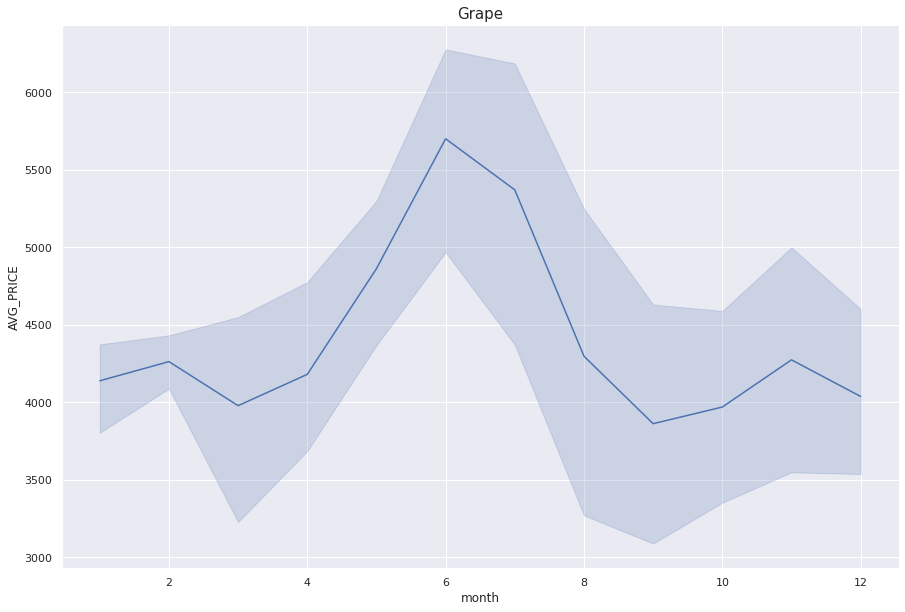

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print()
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "포도"'), x='month', y='AVG_PRICE')
plt.title('Grape', fontsize=15)
plt.show();

In [88]:
train_ = train.groupby(['year','month','PUM_NM'], as_index=False)['AVG_PRICE'].mean()
grape = train_.query('PUM_NM == "포도"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
grape

,month,AVG_PRICE
5,6,5699.5
6,7,5369.9
4,5,4861.1
7,8,4296.3
10,11,4272.6
1,2,4261.3
3,4,4179.0
0,1,4137.6
11,12,4036.5
2,3,3977.0


In [27]:
print('성수기 평균가격 : ', round(grape.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(grape.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  5056.68
비수기 평균가격 :  3960.57


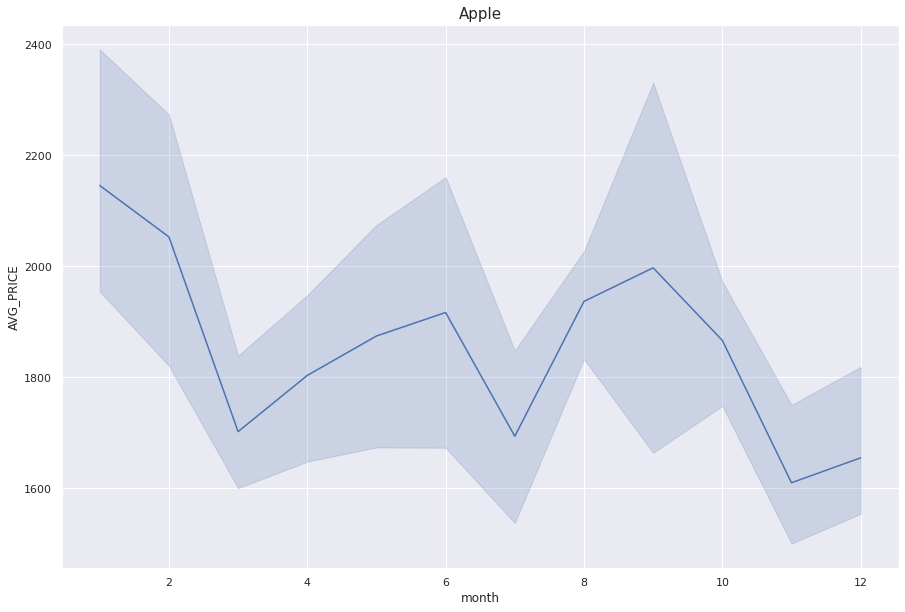

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "사과"'), x='month', y='AVG_PRICE')
plt.title('Apple', fontsize=15)
plt.show();

In [28]:
apple = train_.query('PUM_NM == "사과"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
apple

,month,AVG_PRICE
0,1,2145.9
1,2,2053.2
8,9,1997.5
7,8,1937.0
5,6,1917.0
4,5,1874.6
9,10,1866.8
3,4,1803.5
2,3,1702.3
6,7,1693.9


In [31]:
print('성수기 평균가격 : ', round(apple.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(apple.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  2033.38
비수기 평균가격 :  1665.33


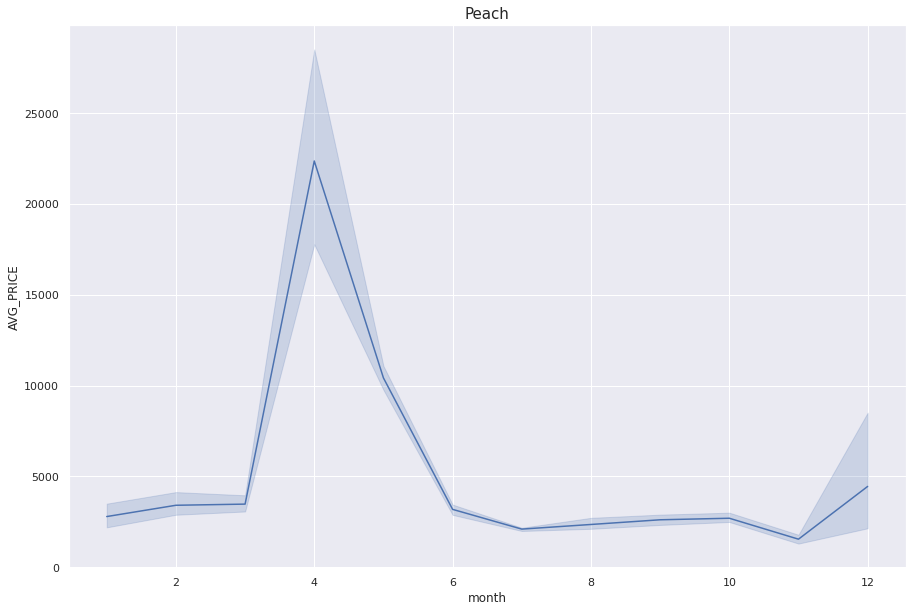

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "복숭아"'), x='month', y='AVG_PRICE')
plt.title('Peach', fontsize=15)
plt.show();

In [32]:
peach = train_.query('PUM_NM == "복숭아"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
peach

,month,AVG_PRICE
3,4,22363.0
4,5,10419.8
11,12,4446.0
2,3,3472.4
1,2,3408.8
5,6,3183.0
0,1,2787.4
9,10,2694.9
8,9,2609.8
7,8,2351.5


In [33]:
print('성수기 평균가격 : ', round(peach.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(peach.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  10175.3
비수기 평균가격 :  2150.06


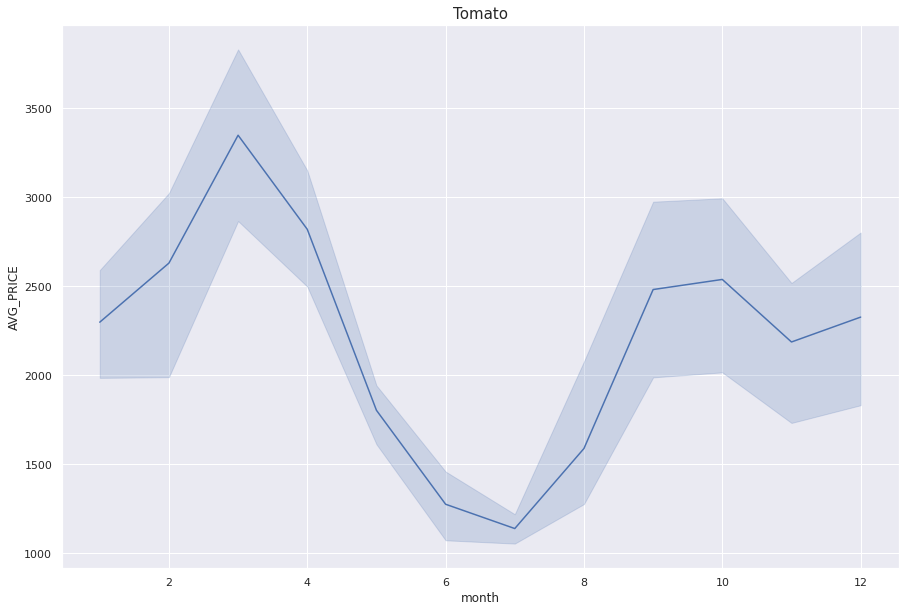

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "토마토"'), x='month', y='AVG_PRICE')
plt.title('Tomato', fontsize=15)
plt.show();

In [34]:
tomato = train_.query('PUM_NM == "토마토"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
tomato

,month,AVG_PRICE
2,3,3347.8
3,4,2819.3
1,2,2629.5
9,10,2537.7
8,9,2481.0
11,12,2326.1
0,1,2297.6
10,11,2186.4
4,5,1802.7
7,8,1588.1


In [35]:
print('성수기 평균가격 : ', round(tomato.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(tomato.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  2833.57
비수기 평균가격 :  1451.04


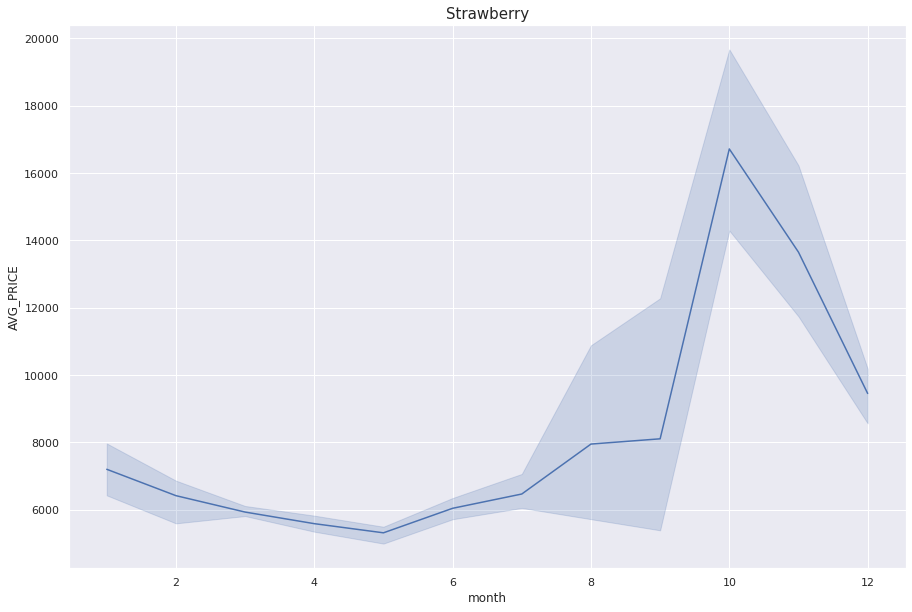

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "딸기"'), x='month', y='AVG_PRICE')
plt.title('Strawberry', fontsize=15)
plt.show();

In [36]:
Strawberry = train_.query('PUM_NM == "딸기"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
Strawberry

,month,AVG_PRICE
9,10,16717.0
10,11,13651.7
11,12,9455.7
8,9,8108.9
7,8,7952.6
0,1,7203.9
6,7,6469.7
1,2,6420.8
5,6,6045.3
2,3,5933.4


In [37]:
print('성수기 평균가격 : ', round(Strawberry.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(Strawberry.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  11983.32
비수기 평균가격 :  5721.31


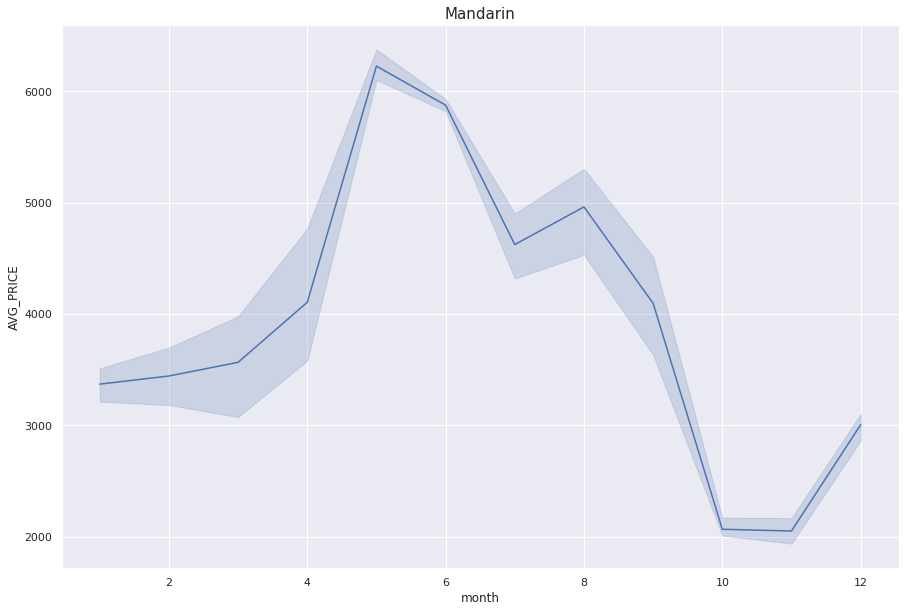

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "감귤"'), x='month', y='AVG_PRICE')
plt.title('Mandarin', fontsize=15)
plt.show();

In [38]:
Mandarin = train_.query('PUM_NM == "감귤"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
Mandarin

,month,AVG_PRICE
4,5,6227.8
5,6,5877.0
7,8,4962.5
6,7,4623.9
3,4,4105.3
8,9,4095.8
2,3,3565.5
1,2,3442.7
0,1,3369.5
11,12,3005.0


In [39]:
print('성수기 평균가격 : ', round(Mandarin.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(Mandarin.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  5422.8
비수기 평균가격 :  2622.24


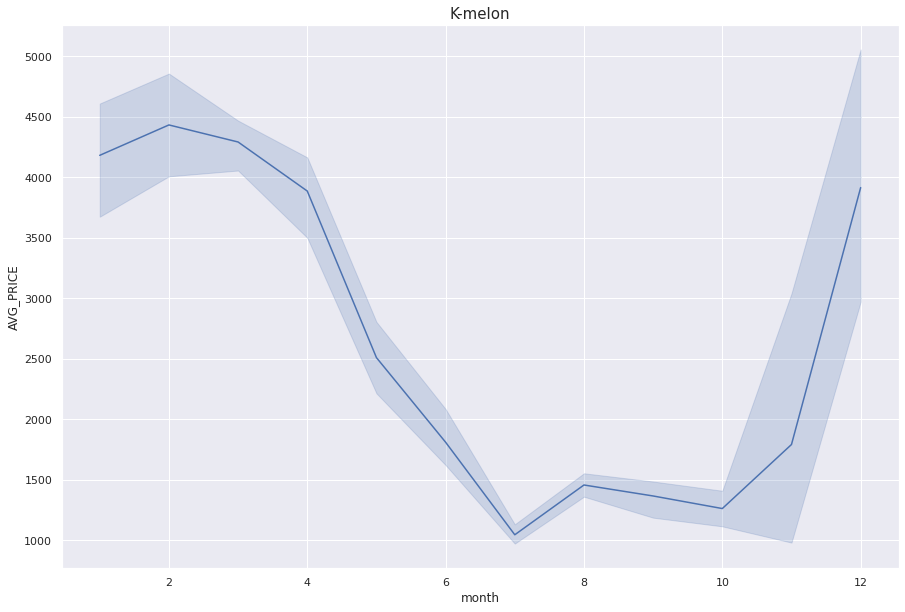

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "참외"'), x='month', y='AVG_PRICE')
plt.title('K-melon', fontsize=15)
plt.show();

In [41]:
Kmelon = train_.query('PUM_NM == "참외"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
Kmelon

,month,AVG_PRICE
1,2,4433.8
2,3,4292.7
0,1,4182.4
11,12,3915.6
3,4,3886.9
4,5,2508.9
5,6,1808.9
10,11,1790.2
7,8,1455.3
8,9,1364.4


In [42]:
print('성수기 평균가격 : ', round(Kmelon.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(Kmelon.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  4206.13
비수기 평균가격 :  1280.9


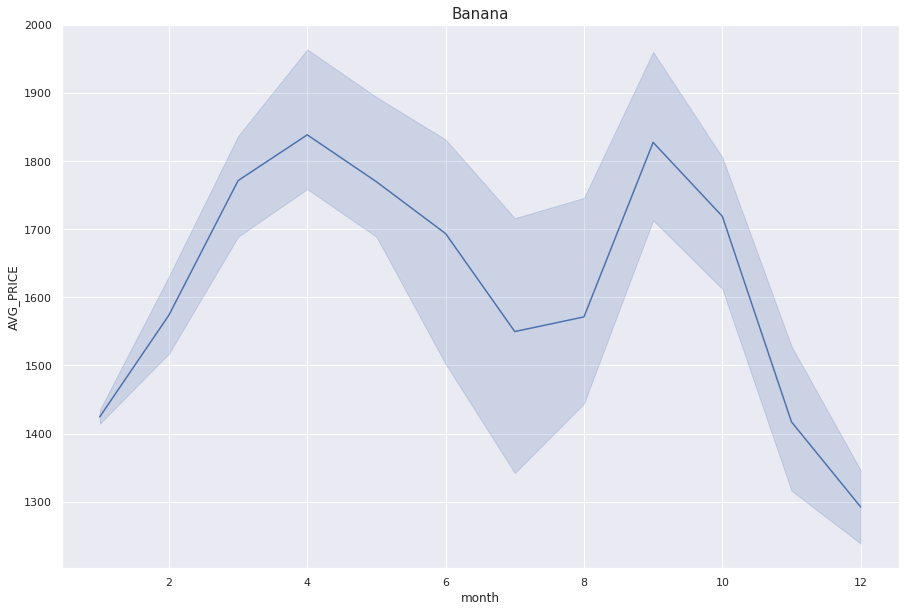

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "바나나"'), x='month', y='AVG_PRICE')
plt.title('Banana', fontsize=15)
plt.show();

In [43]:
Banana = train_.query('PUM_NM == "바나나"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
Banana

,month,AVG_PRICE
3,4,1838.5
8,9,1827.4
2,3,1771.3
4,5,1769.6
9,10,1718.9
5,6,1693.5
1,2,1573.9
7,8,1571.2
6,7,1549.7
0,1,1424.5


In [44]:
print('성수기 평균가격 : ', round(Banana.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(Banana.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  1801.7
비수기 평균가격 :  1420.88


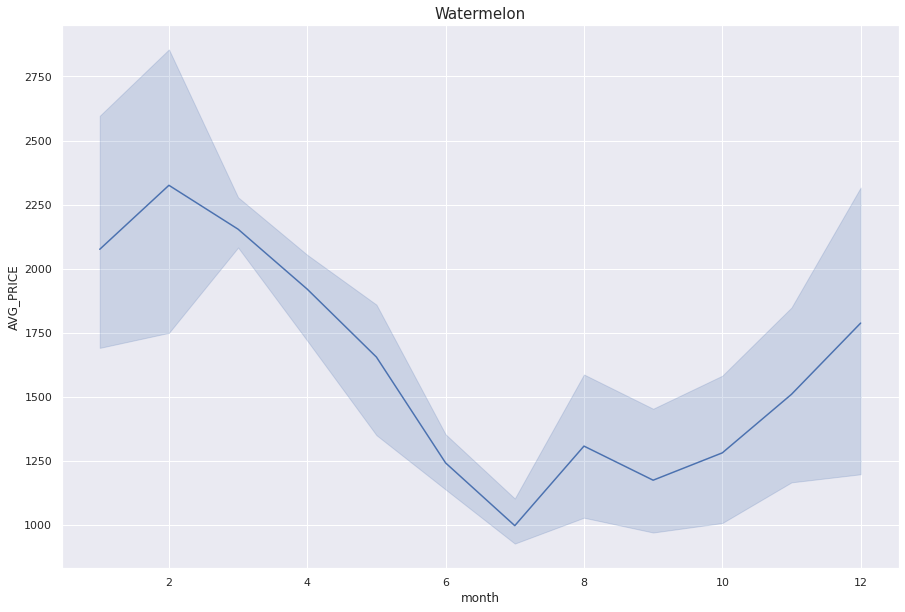

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "수박"'), x='month', y='AVG_PRICE')
plt.title('Watermelon', fontsize=15)
plt.show();

In [45]:
Watermelon = train_.query('PUM_NM == "수박"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
Watermelon

,month,AVG_PRICE
1,2,2325.4
2,3,2154.1
0,1,2075.7
3,4,1920.0
11,12,1787.8
4,5,1655.1
10,11,1509.8
7,8,1307.8
9,10,1281.4
5,6,1242.1


In [46]:
print('성수기 평균가격 : ', round(Watermelon.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(Watermelon.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  2118.82
비수기 평균가격 :  1173.93


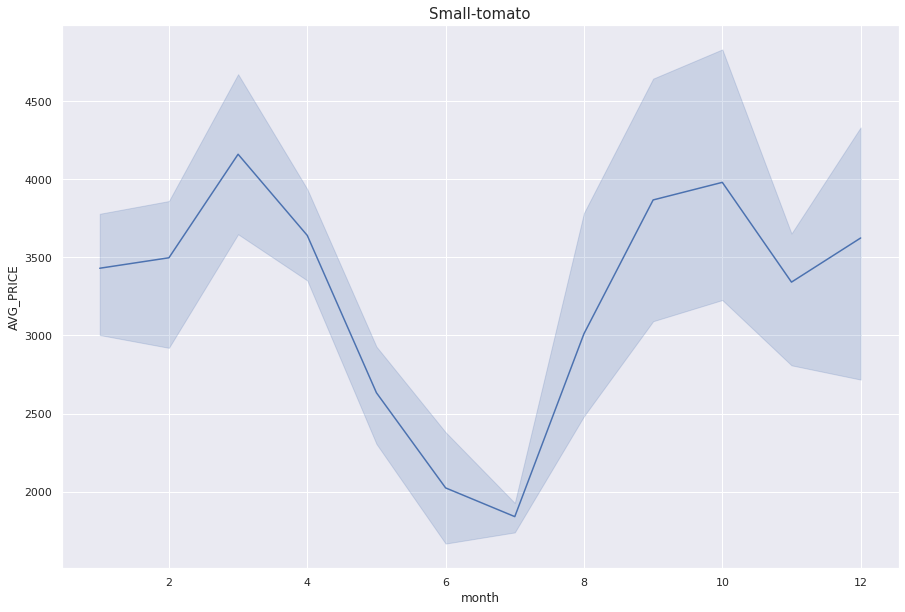

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.rcParams['font.family'] = 'NanumGothic'
sns.lineplot(data=train_.query('PUM_NM == "방울토마토"'), x='month', y='AVG_PRICE')
plt.title('Small-tomato', fontsize=15)
plt.show();

In [47]:
stomato = train_.query('PUM_NM == "방울토마토"').groupby('month', as_index=False)['AVG_PRICE'].mean().sort_values('AVG_PRICE', ascending=False)
stomato

,month,AVG_PRICE
2,3,4159.8
9,10,3979.9
8,9,3867.3
3,4,3640.2
11,12,3623.8
1,2,3497.1
0,1,3430.2
10,11,3341.4
7,8,3011.0
4,5,2633.3


In [48]:
print('성수기 평균가격 : ', round(stomato.AVG_PRICE.head(4).mean(), 2))
print('비수기 평균가격 : ', round(stomato.AVG_PRICE.tail(4).mean(), 2))

성수기 평균가격 :  3911.79
비수기 평균가격 :  2377.31


## 기준모델

In [89]:
train_.query('month == 1').groupby(['year','PUM_NM'])['AVG_PRICE'].mean().sort_values(ascending=False).head(10)

year  PUM_NM
2018  딸기       8259.1
2019  딸기       7317.2
2017  딸기       7105.3
2016  딸기       6133.9
2019  참외       4755.1
2016  참외       4466.3
2019  포도       4402.2
2017  포도       4343.2
2018  포도       4182.6
      참외       4094.8
Name: AVG_PRICE, dtype: float64

In [90]:
train_.query('month == 2').groupby(['year','PUM_NM'])['AVG_PRICE'].mean().sort_values(ascending=False).head(10)

year  PUM_NM
2019  딸기       6902.6
2018  딸기       6830.6
2016  딸기       6729.2
2017  딸기       5221.0
2019  참외       4921.1
2017  참외       4796.5
      포도       4488.0
2018  복숭아      4480.7
2016  포도       4272.7
2019  포도       4259.6
Name: AVG_PRICE, dtype: float64

In [91]:
train_.query('month == 3').groupby(['year','PUM_NM'])['AVG_PRICE'].mean().sort_values(ascending=False).head(10)

year  PUM_NM
2018  딸기       6213.5
2016  딸기       5890.6
2019  딸기       5816.2
2017  딸기       5813.5
2016  포도       4804.3
      방울토마토    4762.2
2019  방울토마토    4581.4
2018  참외       4518.3
2019  참외       4380.9
2016  참외       4323.0
Name: AVG_PRICE, dtype: float64

In [92]:
train_.query('month == 4').groupby(['year','PUM_NM'])['AVG_PRICE'].mean().sort_values(ascending=False).head(10)

year  PUM_NM
2016  복숭아      31946.4
2019  복숭아      21950.1
2018  복숭아      18185.0
2017  복숭아      17370.3
2019  딸기        5858.8
2018  딸기        5796.0
2016  딸기        5352.5
2017  딸기        5349.8
2016  포도        5056.4
2019  감귤        4907.0
Name: AVG_PRICE, dtype: float64

In [93]:
train_.query('month == 5').groupby(['year','PUM_NM'])['AVG_PRICE'].mean().sort_values(ascending=False).head(10)

year  PUM_NM
2017  복숭아      11341.8
2018  복숭아      10809.0
2016  복숭아       9991.3
2019  복숭아       9536.9
2016  감귤        6445.3
2019  감귤        6226.0
2018  감귤        6176.5
2017  감귤        6063.3
      딸기        5500.6
2019  딸기        5489.1
Name: AVG_PRICE, dtype: float64

In [94]:
train_.query('month == 6').groupby(['year','PUM_NM'])['AVG_PRICE'].mean().sort_values(ascending=False).head(10)

year  PUM_NM
2017  딸기       6435.0
      포도       6391.0
2019  딸기       6265.8
2016  감귤       5961.3
2018  딸기       5941.7
2019  포도       5931.7
      감귤       5901.9
2018  감귤       5842.5
2017  감귤       5802.4
2018  포도       5777.9
Name: AVG_PRICE, dtype: float64

* 월 평균가격을 확인했을 때 1-3월은 딸기, 4-5월은 복숭아, 6월은 딸기를 판매해야 한다.

In [115]:
train_.query('(month == 1 or month == 2 or month == 3 or month == 6) and PUM_NM == "딸기"')['AVG_PRICE'].mean()

6400.857658369807

In [120]:
train_.query('(month == 4 or month == 5) and PUM_NM == "복숭아"')['AVG_PRICE'].mean()

16391.364588575318

In [121]:
base1 = train.drop('SALEDATE', axis=1).query('PUM_NM == "딸기" and (month == 1 or month == 2 or month == 3 or month == 6)')
base2 = train.drop('SALEDATE', axis=1).query('PUM_NM == "복숭아" and (month == 4 or month == 5)')

base1['avg'] = 6400
base2['avg'] = 16391

In [236]:
base2['market'] = 9008
base1['market'] = 9900

In [237]:
baseline = pd.concat([base1, base2])
baseline = baseline.reset_index(drop=True).drop(['year','month'], axis=1)
baseline

,PUM_NM,KIND_NM,LV_NM,TOT_QTY,TOT_AMT,AVG_PRICE,avg,market
0,딸기,설향,상,305.0,3215500.0,10542.6,6400,9900
1,딸기,금실,특,2.0,15000.0,7500.0,6400,9900
2,딸기,기타딸기,등외,41.0,172800.0,4214.6,6400,9900
3,딸기,기타딸기,보통,78.0,357600.0,4584.6,6400,9900
4,딸기,기타딸기,상,5275.7,50896500.0,9647.3,6400,9900
...,...,...,...,...,...,...,...,...
12230,복숭아,털복숭아일반,특,7.0,5000.0,714.3,16391,9008
12231,복숭아,황도,등외,56.0,571000.0,10196.4,16391,9008
12232,복숭아,황도,보통,15.0,25200.0,1680.0,16391,9008
12233,복숭아,황도,상,1552.5,12225600.0,7874.8,16391,9008


In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(baseline['AVG_PRICE'], baseline['avg'])
mae = mean_absolute_error(baseline['AVG_PRICE'], baseline['avg'])
rmse = mse ** 0.5
r2 = r2_score(baseline['AVG_PRICE'], baseline['avg'])
display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,26719291.1
1,MAE,3021.9
2,RMSE,5169.1
3,R2,0.0


In [238]:
mean_absolute_error(baseline['AVG_PRICE'], baseline['market'])

4655.181707505405

# Part3

## 모델링

In [196]:
train1 = train.drop('SALEDATE', axis=1).reset_index(drop=True)
val1 = val.drop('SALEDATE', axis=1).reset_index(drop=True)
test1 = test.drop('SALEDATE', axis=1).reset_index(drop=True)

In [197]:
target = 'AVG_PRICE'
feature = train1.drop(columns=[target,'TOT_AMT']).columns

In [198]:
x_train = train1[feature]
y_train = train1[target]
x_val = val1[feature]
y_val = val1[target]
x_test = test1[feature]
y_test = test1[target]

In [199]:
x_train

,PUM_NM,KIND_NM,LV_NM,TOT_QTY,year,month
0,감귤,조생귤,상,12240.0,2016,1
1,감귤,천헤향,상,96.0,2016,1
2,감귤,황금향,상,108.0,2016,1
3,딸기,설향,상,305.0,2016,1
4,바나나,바나나수입,상,702.0,2016,1
...,...,...,...,...,...,...
243381,포도,포도,등외,536.0,2019,12
243382,포도,포도,특,2529.2,2019,12
243383,포도,포도수입,등외,4300.0,2019,12
243384,포도,포도수입,상,204.8,2019,12


In [134]:
!pip install category_encoders
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 661 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [200]:
pipe = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(n_jobs=-1, random_state=10, objective ='reg:linear')
)

dist = {
    'xgbregressor__n_estimators': range(100, 3001, 100),
    'xgbregressor__learning_rate': np.arange(0.1, 0.31, 0.1),
    'xgbregressor__max_depth': range(1, 11, 1),
    'xgbregressor__subsample': np.arange(0.5, 1.1, 0.1),
    'xgbregressor__colsample_bytree': np.arange(0.5, 1.1, 0.1),
    'xgbregressor__colsample_bylevel': np.arange(0.5, 1.1, 0.1),
    'xgbregressor__gamma': range(0, 10, 1)
}

clf = RandomizedSearchCV(
    pipe,
    param_distributions=dist,
    n_iter=10,
    cv=2,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[04:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbregressor',
                                              XGBRegressor(n_jobs=-1,
                                                           random_state=10))]),
                   n_jobs=-1,
                   param_distributions={'xgbregressor__colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
                                        'xgbregressor__colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
                                        'xgbregressor__gamma': range(0, 10),
                                        'xgbregressor__learning_rate': array([0.1, 0.2, 0.3]),
                                        'xgbregressor__max_depth': range(1, 11),
                                        'xgbregressor__n_estimators': range(100, 3001, 100),
                     

In [201]:
pipe = clf.best_estimator_
y_pred = pipe.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred)
display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,3216801.6
1,MAE,1016.2
2,RMSE,1793.5
3,R2,0.7


In [202]:
pipe

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['PUM_NM', 'KIND_NM', 'LV_NM'],
                                mapping=[{'col': 'PUM_NM',
                                          'data_type': dtype('O'),
                                          'mapping': 감귤        1
딸기        2
바나나       3
방울토마토     4
사과        5
포도        6
수박        7
토마토       8
복숭아       9
참외       10
NaN      -2
dtype: int64},
                                         {'col': 'KIND_NM',
                                          'data_type': dtype('O'),
                                          'mapping': 조생귤        1
천헤향        2
황금향        3
설향         4
바나나수입      5
        ... 
토마토묘     131
신수백도     132
사과수입     133
감귤수입     134
NaN       -2
Length: 135, dtype: int64},
                                         {'col': 'LV_NM',
                                          'data_type': dtype('O'),
                                          'mapping': 상      1
특      2
등외     3
보통     4
NaN  

In [203]:
y_pred2 = pipe.predict(x_test)
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred2)
display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,86606295.5
1,MAE,1408.6
2,RMSE,9306.3
3,R2,0.4


In [204]:
y_pred = pd.DataFrame(data=y_pred2, columns=[target])
y_pred

,AVG_PRICE
0,2331.4
1,2393.4
2,2471.5
3,5777.1
4,1748.3
...,...
28476,5273.4
28477,6090.6
28478,7006.0
28479,4360.5


In [205]:
y_pred = pd.concat([x_test, y_pred], axis=1)

In [206]:
y_pred

,PUM_NM,KIND_NM,LV_NM,TOT_QTY,year,month,AVG_PRICE
0,감귤,기타감귤,등외,7885.0,2021,1,2331.4
1,감귤,기타감귤,상,2260.0,2021,1,2393.4
2,감귤,기타감귤,특,16895.0,2021,1,2471.5
3,감귤,레드향,특,4525.0,2021,1,5777.1
4,감귤,조생귤,등외,35137.5,2021,1,1748.3
...,...,...,...,...,...,...,...
28476,포도,캠벨얼리,보통,721.0,2021,6,5273.4
28477,포도,캠벨얼리,상,3280.0,2021,6,6090.6
28478,포도,캠벨얼리,특,7477.0,2021,6,7006.0
28479,포도,포도수입,상,18.2,2021,6,4360.5


In [207]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder())),
    ('xgb', XGBRegressor(colsample_bylevel=0.9,
                         colsample_bytree=0.9,
                         max_depth=9,
                         n_estimators=2700,
                         gamma=9,
                         n_jobs=-1,
                         random_state=10,
                         subsample=0.6)) 
])

In [208]:
pipe.fit(x_train, y_train)
print('검증 정확도: ', pipe.score(x_val, y_val))

[05:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
검증 정확도:  0.7293379626366809


In [153]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.9 MB/s 
     |████████████████████████████████| 133 kB 56.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5191c409d8346cbc512b8a83d0577d421a6484a1631dce441d4e4e98116ad781
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [209]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['xgb'],
    scoring='r2',
    n_iter=5,
    random_state=2
)

x_val_transformed = pipe.named_steps['preprocessing'].transform(x_val)

permuter.fit(x_val_transformed, y_val);

In [210]:
feature_names = x_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

year      0.0
TOT_QTY   0.2
LV_NM     0.2
month     0.5
PUM_NM    0.6
KIND_NM   1.0
dtype: float64

## 모델 해석

In [211]:
y_pred

,PUM_NM,KIND_NM,LV_NM,TOT_QTY,year,month,AVG_PRICE
0,감귤,기타감귤,등외,7885.0,2021,1,2331.4
1,감귤,기타감귤,상,2260.0,2021,1,2393.4
2,감귤,기타감귤,특,16895.0,2021,1,2471.5
3,감귤,레드향,특,4525.0,2021,1,5777.1
4,감귤,조생귤,등외,35137.5,2021,1,1748.3
...,...,...,...,...,...,...,...
28476,포도,캠벨얼리,보통,721.0,2021,6,5273.4
28477,포도,캠벨얼리,상,3280.0,2021,6,6090.6
28478,포도,캠벨얼리,특,7477.0,2021,6,7006.0
28479,포도,포도수입,상,18.2,2021,6,4360.5


In [217]:
y_pred.query('month < 3 and PUM_NM == "감귤"')['KIND_NM'].value_counts()

조생귤      193
기타감귤     191
천헤향      185
비가림감귤    177
레드향      176
하우스감귤    156
감귤        79
황금향       46
Name: KIND_NM, dtype: int64

In [230]:
pred1 = y_pred.query('month < 3 and PUM_NM == "감귤" and KIND_NM == "레드향" and LV_NM == "특"')
pred1['MARKET'] = 12226
pred1.head(5)

,PUM_NM,KIND_NM,LV_NM,TOT_QTY,year,month,AVG_PRICE,MARKET
3,감귤,레드향,특,4525.0,2021,1,5777.1,12226
86,감귤,레드향,특,21576.0,2021,1,5857.5,12226
262,감귤,레드향,특,14326.0,2021,1,5857.1,12226
429,감귤,레드향,특,11833.0,2021,1,5737.9,12226
605,감귤,레드향,특,17911.0,2021,1,5760.5,12226


* 1-2월 중순까지는 감귤의 수요가 높으므로 감귤 중 가장 수요가 높은 레드향을 판매해야한다.

In [218]:
y_pred.query('month > 1 and month < 6 and PUM_NM == "토마토"')['KIND_NM'].value_counts()

완숙토마토    408
토마토일반    408
기타토마토    406
대저토마토    402
마스카라     340
찰토마토     337
토마토묘      84
Name: KIND_NM, dtype: int64

In [231]:
pred2 = y_pred.query('month > 2 and month < 6 and PUM_NM == "토마토" and KIND_NM == "대저토마토" and LV_NM == "특"')
pred2['MARKET'] = 12880
pred2.head(5)

,PUM_NM,KIND_NM,LV_NM,TOT_QTY,year,month,AVG_PRICE,MARKET
8357,토마토,대저토마토,특,5337.5,2021,3,4581.1,12880
8534,토마토,대저토마토,특,3535.0,2021,3,4481.0,12880
8732,토마토,대저토마토,특,3641.0,2021,3,4595.9,12880
8923,토마토,대저토마토,특,2208.5,2021,3,4995.6,12880
9111,토마토,대저토마토,특,1291.5,2021,3,5381.3,12880


* 2월 중순부터 6월 초까지는 토마토 중에서도 가장 수요가 많은 대저토마토를 판매해야 한다

In [225]:
y_pred.query('month == 6 and PUM_NM == "복숭아"')['KIND_NM'].value_counts()

기타복숭아     104
천도        104
황도        102
백도         88
털복숭아일반     86
천도신비       72
사자         70
천홍         64
개복숭아       53
복숭아        41
유명         34
그린황도       32
단황도        32
대지황도       23
이즈미백도      12
원백도         6
미시마         4
장호원황도       3
대화백도        3
천중도백도       2
아부백도        1
Name: KIND_NM, dtype: int64

In [233]:
pred3 = y_pred.query('month == 6 and PUM_NM == "복숭아" and KIND_NM == "천도신비" and LV_NM == "특"')
pred3['MARKET'] = 18780
pred3.head(5)

,PUM_NM,KIND_NM,LV_NM,TOT_QTY,year,month,AVG_PRICE,MARKET
24228,복숭아,천도신비,특,2.5,2021,6,2175.6,18780
24418,복숭아,천도신비,특,52.0,2021,6,6096.5,18780
24615,복숭아,천도신비,특,132.5,2021,6,4910.8,18780
25007,복숭아,천도신비,특,90.0,2021,6,5271.6,18780
25209,복숭아,천도신비,특,210.0,2021,6,4011.4,18780


* 6월 초부터는 복숭아 중에서 가장 수요가 많은 신비복숭아를 판매해야 한다.

In [234]:
pred = pd.concat([pred1, pred2, pred3])
pred

,PUM_NM,KIND_NM,LV_NM,TOT_QTY,year,month,AVG_PRICE,MARKET
3,감귤,레드향,특,4525.0,2021,1,5777.1,12226
86,감귤,레드향,특,21576.0,2021,1,5857.5,12226
262,감귤,레드향,특,14326.0,2021,1,5857.1,12226
429,감귤,레드향,특,11833.0,2021,1,5737.9,12226
605,감귤,레드향,특,17911.0,2021,1,5760.5,12226
...,...,...,...,...,...,...,...,...
27566,복숭아,천도신비,특,3546.0,2021,6,3627.6,18780
27767,복숭아,천도신비,특,4450.0,2021,6,3668.6,18780
27964,복숭아,천도신비,특,4760.5,2021,6,3605.4,18780
28163,복숭아,천도신비,특,1246.5,2021,6,4194.8,18780


In [235]:
mean_absolute_error(pred['AVG_PRICE'], pred['MARKET'])

8805.552222842261